In [9]:
###############################

# 분류 CNN 모델링

###############################

import keras

from keras import models, layers

from keras import backend



class CNN(models.Sequential):

    def __init__(self, input_shape, num_classes):

        super().__init__()



        self.add(layers.Conv2D(32, kernel_size=(3, 3),

                 activation='relu',

                 input_shape=input_shape))

        self.add(layers.Conv2D(64, (3, 3), activation='relu'))

        self.add(layers.MaxPooling2D(pool_size=(2, 2)))

        self.add(layers.Dropout(0.25))

        self.add(layers.Flatten())

        self.add(layers.Dense(128, activation='relu'))

        self.add(layers.Dropout(0.5))

        self.add(layers.Dense(num_classes, activation='softmax'))



        self.compile(loss=keras.losses.categorical_crossentropy,

                      optimizer='rmsprop',

                      metrics=['accuracy'])



###############################

# 분류 CNN을 위한 데이터 준비  

###############################

from keras import datasets 



class DATA():

    def __init__(self):

        num_classes = 10



        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

        img_rows, img_cols = x_train.shape[1:]



        if backend.image_data_format() == 'channels_first':

            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)

            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)

            input_shape = (1, img_rows, img_cols)

        else:

            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)

            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

            input_shape = (img_rows, img_cols, 1)



        x_train = x_train.astype('float32')

        x_test = x_test.astype('float32')

        x_train /= 255

        x_test /= 255



        y_train = keras.utils.to_categorical(y_train, num_classes)

        y_test = keras.utils.to_categorical(y_test, num_classes)

        

        self.input_shape = input_shape

        self.num_classes = num_classes

        self.x_train, self.y_train = x_train, y_train

        self.x_test, self.y_test = x_test, y_test





###########################

#학습 효과 분석

###########################

import matplotlib.pyplot as plt




###############################

# 분류 CNN 학습 및 테스트

###############################

def main():

    batch_size = 128

    epochs = 10



    data = DATA()

    model = CNN(data.input_shape, data.num_classes)



    history = model.fit(data.x_train, data.y_train,

              batch_size=batch_size,

              epochs=epochs,

              validation_split=0.2)



    score = model.evaluate(data.x_test, data.y_test)

    print()

    print('Test loss:', score[0])

    print('Test accuracy:', score[1])



   

if __name__ == '__main__':

    main()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 96us/step - loss: 0.2643 - acc: 0.9194 - val_loss: 0.0641 - val_acc: 0.9807
Epoch 2/10
48000/48000 [==============================] - 4s 89us/step - loss: 0.0926 - acc: 0.9729 - val_loss: 0.0473 - val_acc: 0.9858
Epoch 3/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.0684 - acc: 0.9799 - val_loss: 0.0479 - val_acc: 0.9859
Epoch 4/10
48000/48000 [==============================] - 4s 89us/step - loss: 0.0572 - acc: 0.9832 - val_loss: 0.0445 - val_acc: 0.9867
Epoch 5/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.0508 - acc: 0.9846 - val_loss: 0.0411 - val_acc: 0.9892
Epoch 6/10
48000/48000 [==============================] - 4s 89us/step - loss: 0.0453 - acc: 0.9867 - val_loss: 0.0443 - val_acc: 0.9879
Epoch 7/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.0439 - acc: 0.9874 - val_loss: 0.0412 - val_acc

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.3955 - acc: 0.8916 - val_loss: 0.2178 - val_acc: 0.9414
Epoch 2/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.1896 - acc: 0.9454 - val_loss: 0.1607 - val_acc: 0.9551
Epoch 3/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.1384 - acc: 0.9601 - val_loss: 0.1312 - val_acc: 0.9636
Epoch 4/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.1089 - acc: 0.9694 - val_loss: 0.1218 - val_acc: 0.9638
Epoch 5/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.0880 - acc: 0.9746 - val_loss: 0.1066 - val_acc: 0.9681
Epoch 6/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.0731 - acc: 0.9788 - val_loss: 0.1073 - val_acc: 0.9680
Epoch 7/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.0617 - acc: 0.9824 - val_loss: 0.0985 - val_acc

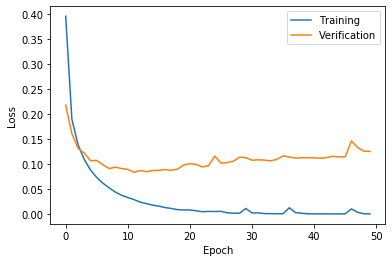

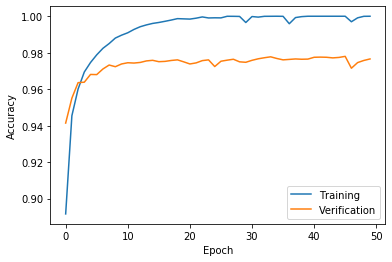

In [2]:
##############################################

# Modeling

##############################################

from keras import layers, models





def ANN_models_func(Nin, Nh, Nout):

    x = layers.Input(shape=(Nin,))

    h = layers.Activation('relu')(layers.Dense(Nh)(x))

    y = layers.Activation('softmax')(layers.Dense(Nout)(h))

    model = models.Model(x, y)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model





def ANN_seq_func(Nin, Nh, Nout):

    model = models.Sequential()

    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))

    model.add(layers.Dense(Nout, activation='softmax'))

    model.compile(loss='categorical_crossentropy',

                  optimizer='adam', metrics=['accuracy'])

    return model





class ANN_models_class(models.Model):

    def __init__(self, Nin, Nh, Nout):

        # Prepare network layers and activate functions

        hidden = layers.Dense(Nh)

        output = layers.Dense(Nout)

        relu = layers.Activation('relu')

        softmax = layers.Activation('softmax')



        # Connect network elements

        x = layers.Input(shape=(Nin,))

        h = relu(hidden(x))

        y = softmax(output(h))



        super().__init__(x, y)

        self.compile(loss='categorical_crossentropy',

                     optimizer='adam', metrics=['accuracy'])





class ANN_seq_class(models.Sequential):

    def __init__(self, Nin, Nh, Nout):

        super().__init__()

        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))

        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy',

                     optimizer='adam', metrics=['accuracy'])





##############################################

# Data

##############################################

import numpy as np

from keras import datasets  # mnist

from keras.utils import np_utils  # to_categorical





def Data_func():

    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()



    Y_train = np_utils.to_categorical(y_train)

    Y_test = np_utils.to_categorical(y_test)



    L, W, H = X_train.shape

    X_train = X_train.reshape(-1, W * H)

    X_test = X_test.reshape(-1, W * H)



    X_train = X_train / 255.0

    X_test = X_test / 255.0



    return (X_train, Y_train), (X_test, Y_test)





##############################################

# Plotting

##############################################

import matplotlib.pyplot as plt





def plot_acc(history, title=None):

    # summarize history for accuracy

    if not isinstance(history, dict):

        history = history.history



    plt.plot(history['acc'])

    plt.plot(history['val_acc'])

    if title is not None:

        plt.title(title)

    plt.ylabel('Accuracy')

    plt.xlabel('Epoch')

    plt.legend(['Training', 'Verification'], loc=0)

    # plt.show()





def plot_loss(history, title=None):

    # summarize history for loss

    if not isinstance(history, dict):

        history = history.history



    plt.plot(history['loss'])

    plt.plot(history['val_loss'])

    if title is not None:

        plt.title(title)

    plt.ylabel('Loss')

    plt.xlabel('Epoch')

    plt.legend(['Training', 'Verification'], loc=0)

    # plt.show()





##############################################

# Main

##############################################

def main():

    Nin = 784

    Nh = 100

    number_of_class = 10

    Nout = number_of_class



    # model = ANN_models_func(Nin, Nh, Nout)

    # model = ANN_models_class(Nin, Nh, Nout)

    model = ANN_seq_class(Nin, Nh, Nout)

    (X_train, Y_train), (X_test, Y_test) = Data_func()



    ##############################################

    # Training

    ##############################################

    history = model.fit(X_train, Y_train, epochs=50 , batch_size=100, validation_split=0.2)

    performace_test = model.evaluate(X_test, Y_test, batch_size=100)

    print('Test Loss and Accuracy ->', performace_test)



    plot_loss(history)

    plt.show()

    plot_acc(history)

    plt.show()





# Run code

if __name__ == '__main__':

    main()

Using TensorFlow backend.







11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/15





48000/48000 [==============================] - 12s 240us/step - loss: 0.3867 - acc: 0.8951 - val_loss: 0.2078 - val_acc: 0.9430
Epoch 2/15
48000/48000 [==============================] - 2s 37us/step - loss: 0.1865 - acc: 0.9468 - val_loss: 0.1615 - val_acc: 0.9547
Epoch 3/15
48000/48000 [==============================] - 2s 39us/step - loss: 0.1377 - acc: 0.9616 - val_loss: 0.1339 - val_acc: 0.9622
Epoch 4/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.1067 - acc: 0.9694 - val_loss: 0.1188 - val_acc: 0.9658
Epoch 5/15
48000/48000 [==============================] - 2s 39us/step - loss: 0.0880 - acc: 0.9744 - val_loss: 0.1064 - val_acc: 0.9695
Epoch 6/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.0719 - acc

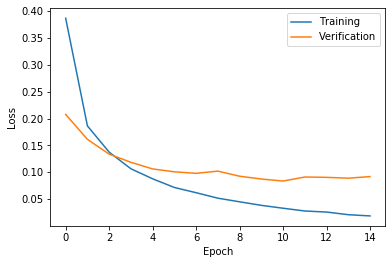

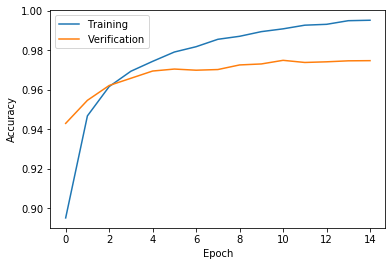

In [1]:
##############################################

# Modeling

##############################################

from keras import layers, models





def ANN_models_func(Nin, Nh, Nout):

    x = layers.Input(shape=(Nin,))

    h = layers.Activation('relu')(layers.Dense(Nh)(x))

    y = layers.Activation('softmax')(layers.Dense(Nout)(h))

    model = models.Model(x, y)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model





def ANN_seq_func(Nin, Nh, Nout):

    model = models.Sequential()

    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))

    model.add(layers.Dense(Nout, activation='softmax'))

    model.compile(loss='categorical_crossentropy',

                  optimizer='adam', metrics=['accuracy'])

    return model





class ANN_models_class(models.Model):

    def __init__(self, Nin, Nh, Nout):

        # Prepare network layers and activate functions

        hidden = layers.Dense(Nh)

        output = layers.Dense(Nout)

        relu = layers.Activation('relu')

        softmax = layers.Activation('softmax')



        # Connect network elements

        x = layers.Input(shape=(Nin,))

        h = relu(hidden(x))

        y = softmax(output(h))



        super().__init__(x, y)

        self.compile(loss='categorical_crossentropy',

                     optimizer='adam', metrics=['accuracy'])





class ANN_seq_class(models.Sequential):

    def __init__(self, Nin, Nh, Nout):

        super().__init__()

        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))

        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy',

                     optimizer='adam', metrics=['accuracy'])





##############################################

# Data

##############################################

import numpy as np

from keras import datasets  # mnist

from keras.utils import np_utils  # to_categorical





def Data_func():

    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()



    Y_train = np_utils.to_categorical(y_train)

    Y_test = np_utils.to_categorical(y_test)



    L, W, H = X_train.shape

    X_train = X_train.reshape(-1, W * H)

    X_test = X_test.reshape(-1, W * H)



    X_train = X_train / 255.0

    X_test = X_test / 255.0



    return (X_train, Y_train), (X_test, Y_test)





##############################################

# Plotting

##############################################

import matplotlib.pyplot as plt





def plot_acc(history, title=None):

    # summarize history for accuracy

    if not isinstance(history, dict):

        history = history.history



    plt.plot(history['acc'])

    plt.plot(history['val_acc'])

    if title is not None:

        plt.title(title)

    plt.ylabel('Accuracy')

    plt.xlabel('Epoch')

    plt.legend(['Training', 'Verification'], loc=0)

    # plt.show()





def plot_loss(history, title=None):

    # summarize history for loss

    if not isinstance(history, dict):

        history = history.history



    plt.plot(history['loss'])

    plt.plot(history['val_loss'])

    if title is not None:

        plt.title(title)

    plt.ylabel('Loss')

    plt.xlabel('Epoch')

    plt.legend(['Training', 'Verification'], loc=0)

    # plt.show()





##############################################

# Main

##############################################

def main():

    Nin = 784

    Nh = 100

    number_of_class = 10

    Nout = number_of_class



    # model = ANN_models_func(Nin, Nh, Nout)

    # model = ANN_models_class(Nin, Nh, Nout)

    model = ANN_seq_class(Nin, Nh, Nout)

    (X_train, Y_train), (X_test, Y_test) = Data_func()



    ##############################################

    # Training

    ##############################################

    history = model.fit(X_train, Y_train, epochs=15 , batch_size=100, validation_split=0.2)

    performace_test = model.evaluate(X_test, Y_test, batch_size=100)

    print('Test Loss and Accuracy ->', performace_test)



    plot_loss(history)

    plt.show()

    plot_acc(history)

    plt.show()





# Run code

if __name__ == '__main__':

    main()